In [1]:
# pip install gym-super-mario-bros

import gym
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT, COMPLEX_MOVEMENT

import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np

import torch
from torch import nn, optim
from torch.nn import functional as F
from collections import deque

In [2]:

env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, COMPLEX_MOVEMENT)


In [4]:
# RUN RANDOM
done = True
for step in range(2500):
    if done:
        state = env.reset()
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    env.render()
env.close()

In [14]:
def downscale_obs(obs, new_size=(42,42), to_gray=True):
    resized = resize(obs, new_size, anti_aliasing=True)
    if to_gray:
        resized = resized.mean(axis=2)
    return resized

In [4]:
env.reset()

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

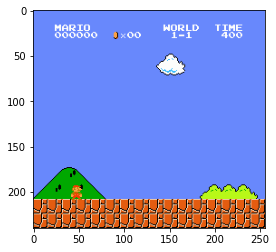

In [6]:
state = env.render('rgb_array')
plt.imshow(state)

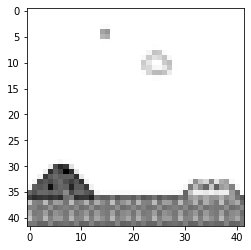

In [12]:
plt.imshow(downscale_obs(state), cmap='gray')

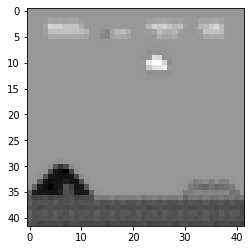

In [10]:
plt.imshow(downscale_obs(state), cmap='gray')

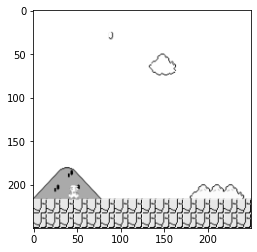

In [13]:
plt.imshow(downscale_obs(state, new_size=(250, 250)), cmap='gray')

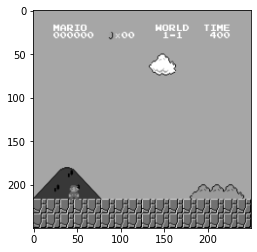

In [15]:
plt.imshow(downscale_obs(state, new_size=(250, 250)), cmap='gray')

In [ ]:
# Preparing state tensor

def prepare_state(state):
    return torch.from_numpy(downscale_obs(state, new_size=(42,42), to_gray=True)).float().unsqueeze(dim=0)

